<a href="https://colab.research.google.com/github/nepomucenoc/modelagem/blob/main/Projeto_modelagem_hart_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 1. Projeto de Introdução à Modelagem usando o dataset de Heart attack
* dataset no kaggle: https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

* UCI: http://archive.ics.uci.edu/ml/datasets/Heart+Disease




## 1.1 Dicionário dos dados:

* age - Idade do paciente 

* sex - Sexo do paciente (1 = male; 0 = female)

* cp - Tipo de dor torácica ~ 0 = angina típica, 1 = angina atípica, 2 = dor não anginosa, 3 = assintomática 

* trtbps - Pressão sanguínea em repouso (em mm Hg)

* chol - Colesterol em mg/dl buscado via sensor de BMI

* fbs - Açúcar no sangue em jejum (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

* restecg - Resultados eletrocardiográficos em repouso ~ 0 = normal, 1 = normalidade da onda ST-T, 2 = hipertrofia ventricular esquerda 

* thalachh - Frequência cardíaca máxima alcançada 

* oldpeak - Pico anterior

* slp - Inclinação (slope)

* ca - Número de vasos principais no coração(0-3)

* thall - Teste de estresse (Thalium Stress Test) result ~ (0,3)

* exng - Angina induzida por exercício ~ 1 = Yes, 0 = No

* output - Target variable 0= menos chance de ter um ataque do coração 1= mais chance de ter um ataque do coração

## 1.2 Objetivo

* Realizar a Análise exploratória de dados (EDA) e prever se uma pessoa está sujeita a um ataque cardíaco ou não. 


# **Análise exploratória dos dados e pré-processamento**

In [ ]:
! pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np 
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Images
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns

# Perfomance
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Cross-validation
from sklearn.model_selection import cross_val_score, KFold,RepeatedKFold

#Feature selection
from sklearn.feature_selection import SelectKBest,f_classif

import warnings
warnings.filterwarnings("ignore")

**Read the dataset**

In [ ]:
heart = pd.read_cv('/content/drive/MyDrive/Colab Notebooks/mestrado/S1/intro_modelagem/projeto_1/dataset/heart.csv')

In [ ]:
heart.head()

age  sex  cp  trtbps  chol  fbs  ...  exng  oldpeak  slp  caa  thall  output
0   63    1   3     145   233    1  ...     0      2.3    0    0      1       1
1   37    1   2     130   250    0  ...     0      3.5    0    0      2       1
2   41    0   1     130   204    0  ...     0      1.4    2    0      2       1
3   56    1   1     120   236    0  ...     0      0.8    2    0      2       1
4   57    0   0     120   354    0  ...     1      0.6    2    0      2       1

[5 rows x 14 columns]

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart.describe()

age         sex          cp  ...         caa       thall      output
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...    0.729373    2.313531    0.544554
std      9.082101    0.466011    1.032052  ...    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]

In [ ]:
heart.shape

(303, 14)

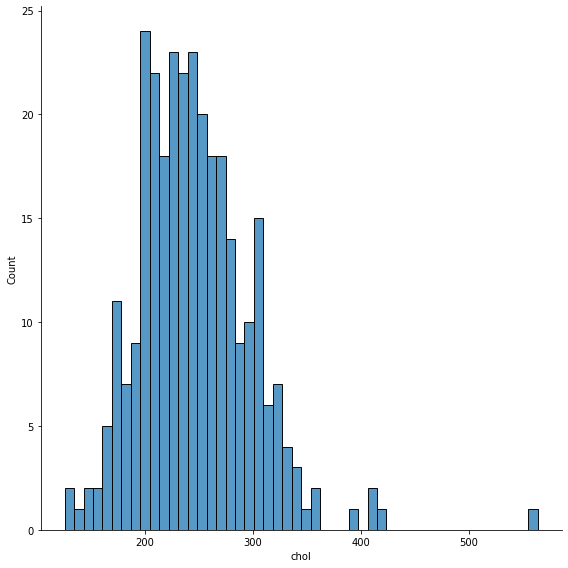

In [ ]:
sns.displot(heart['chol'], bins=50, height=8);

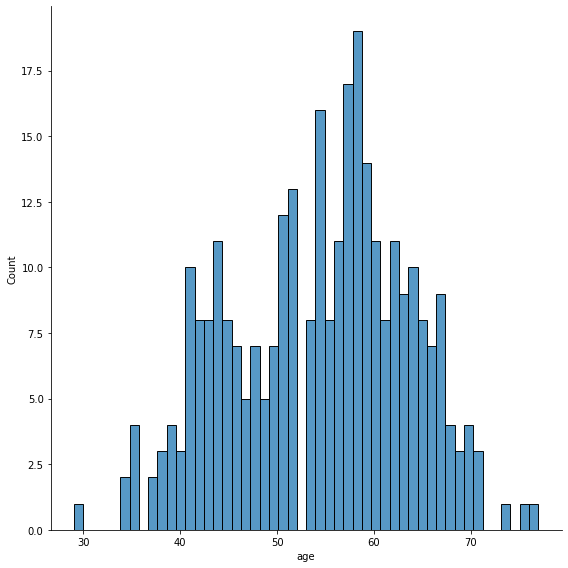

In [ ]:
sns.displot(heart['age'], bins=50, height=8);

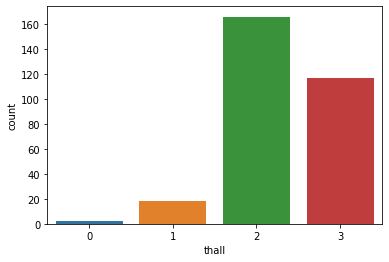

In [ ]:
sns.countplot(x= 'thall', data=heart);

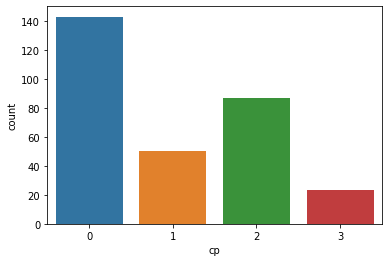

In [ ]:
sns.countplot(x= 'cp', data=heart);

**Contando os diferentes atributos para cada coluna:**

In [ ]:
print('> Age')
display(heart['age'].value_counts())
print()
print('> sex')
display(heart['sex'].value_counts())
print()
print('> cp')
display(heart['cp'].value_counts())
print()
print('> trtbps')
display(heart['trtbps'].value_counts())
print()
print('> chol')
display(heart['chol'].value_counts())
print()
print('> fbs')
display(heart['fbs'].value_counts())
print()
print('> restecg')
display(heart['restecg'].value_counts())
print()
print('> thalachh')
display(heart['thalachh'].value_counts())
print()
print('> exng')
display(heart['exng'].value_counts())
print()
print('> oldpeak')
display(heart['oldpeak'].value_counts())
print()
print('> slp')
display(heart['slp'].value_counts())
print()
print('> caa')
display(heart['caa'].value_counts())
print()
print('> thall')
display(heart['thall'].value_counts())
print()
print('> output')
display(heart['output'].value_counts())
print()

> Age


58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64


> sex


1    207
0     96
Name: sex, dtype: int64


> cp


0    143
2     87
1     50
3     23
Name: cp, dtype: int64


> trtbps


120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1
123     1
200     1
Name: trtbps, dtype: int64


> chol


234    6
204    6
197    6
269    5
212    5
      ..
278    1
281    1
284    1
290    1
564    1
Name: chol, Length: 152, dtype: int64


> fbs


0    258
1     45
Name: fbs, dtype: int64


> restecg


1    152
0    147
2      4
Name: restecg, dtype: int64


> thalachh


162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalachh, Length: 91, dtype: int64


> exng


0    204
1     99
Name: exng, dtype: int64


> oldpeak


0.0    99
1.2    17
0.6    14
1.0    14
0.8    13
1.4    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.6     6
2.8     6
1.9     5
1.5     5
0.5     5
3.0     5
2.2     4
3.6     4
2.4     3
3.4     3
4.0     3
0.9     3
0.3     3
2.3     2
4.2     2
1.1     2
2.5     2
3.2     2
6.2     1
2.1     1
4.4     1
1.3     1
3.1     1
0.7     1
5.6     1
3.8     1
2.9     1
3.5     1
Name: oldpeak, dtype: int64


> slp


2    142
1    140
0     21
Name: slp, dtype: int64


> caa


0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64


> thall


2    166
3    117
1     18
0      2
Name: thall, dtype: int64


> output


1    165
0    138
Name: output, dtype: int64

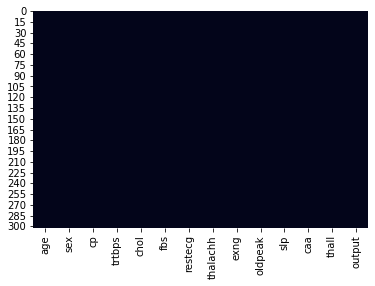

In [ ]:
#Procurando dados faltantes
sns.heatmap(heart.isnull(), cbar = False);

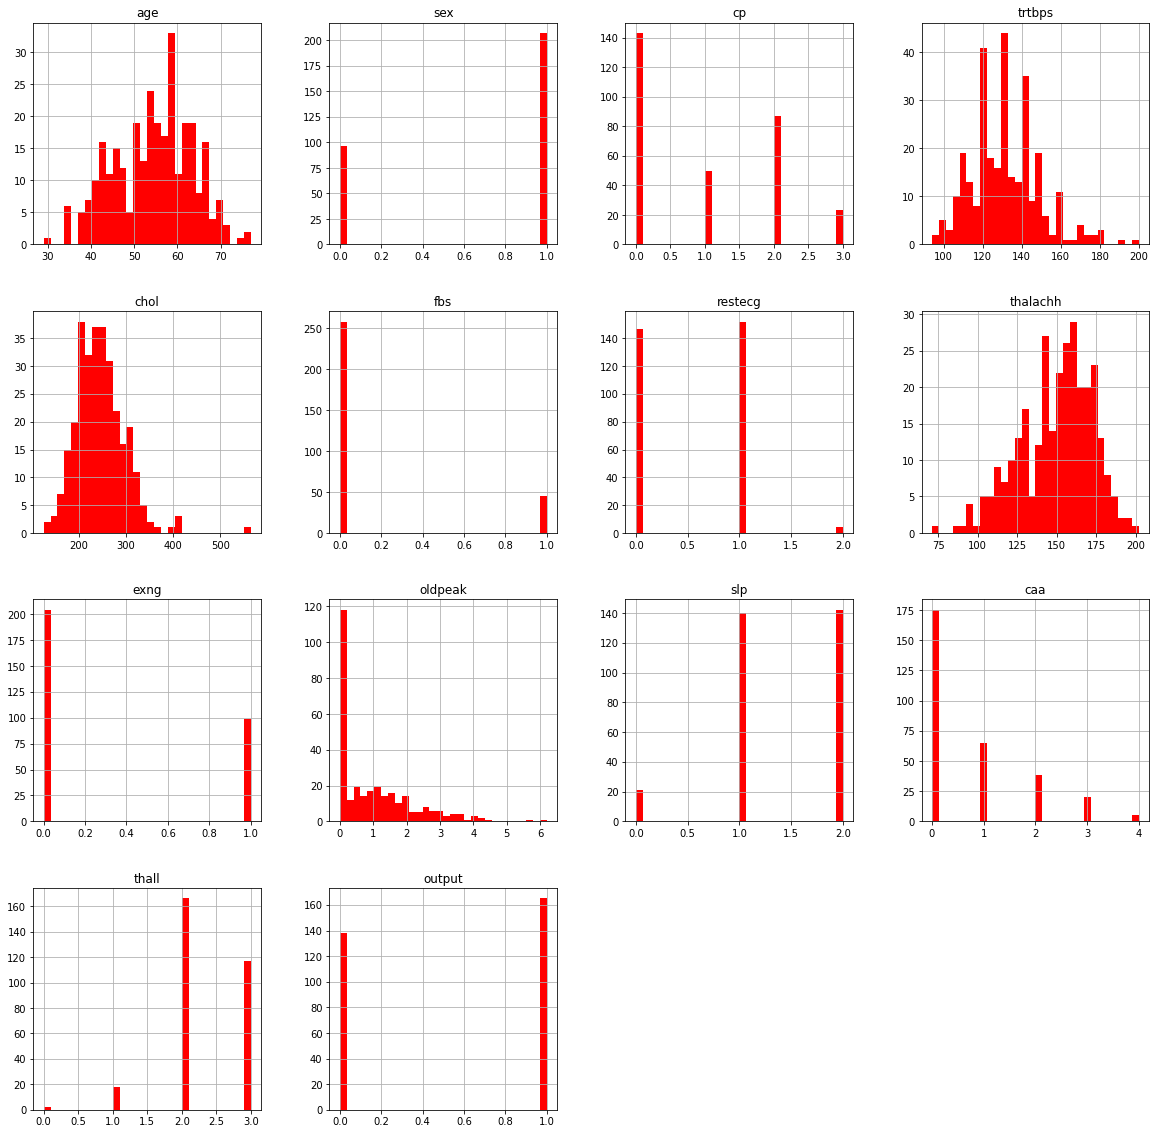

In [ ]:
heart.hist(bins = 30, figsize=(20,20), color = 'r');

In [ ]:
menos_chance = heart[heart['output']==0]
mais_chance = heart[heart['output']==1]

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(heart, title='Heart Attack Dataset', html = {'style':{'full_width':True}})

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

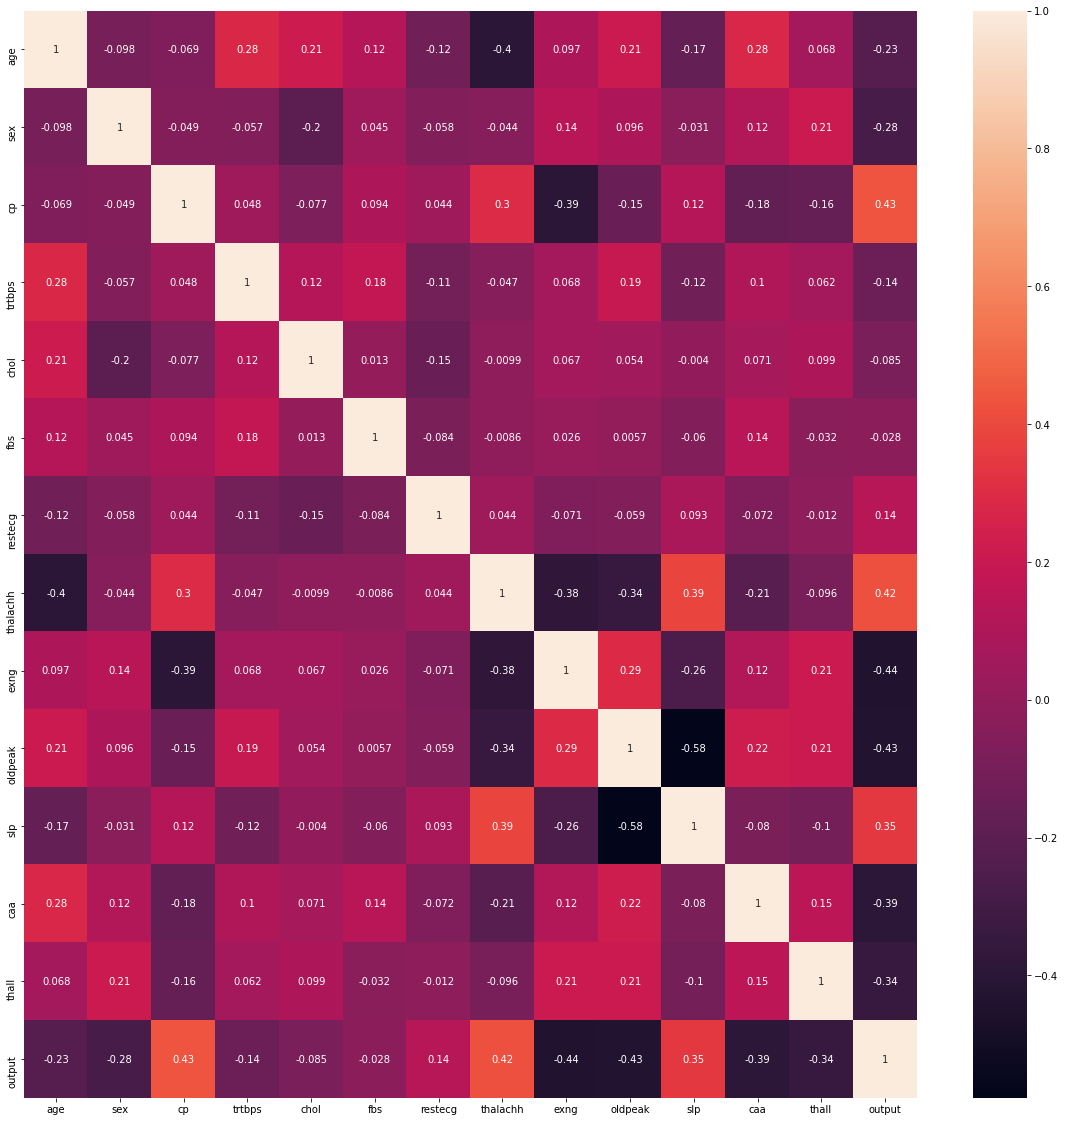

In [ ]:
correlations = heart.corr()

plt.figure(figsize=(20, 20)) #f, ax = plt.subplots(figsize= (20,20))
sns.heatmap(correlations, annot = True);

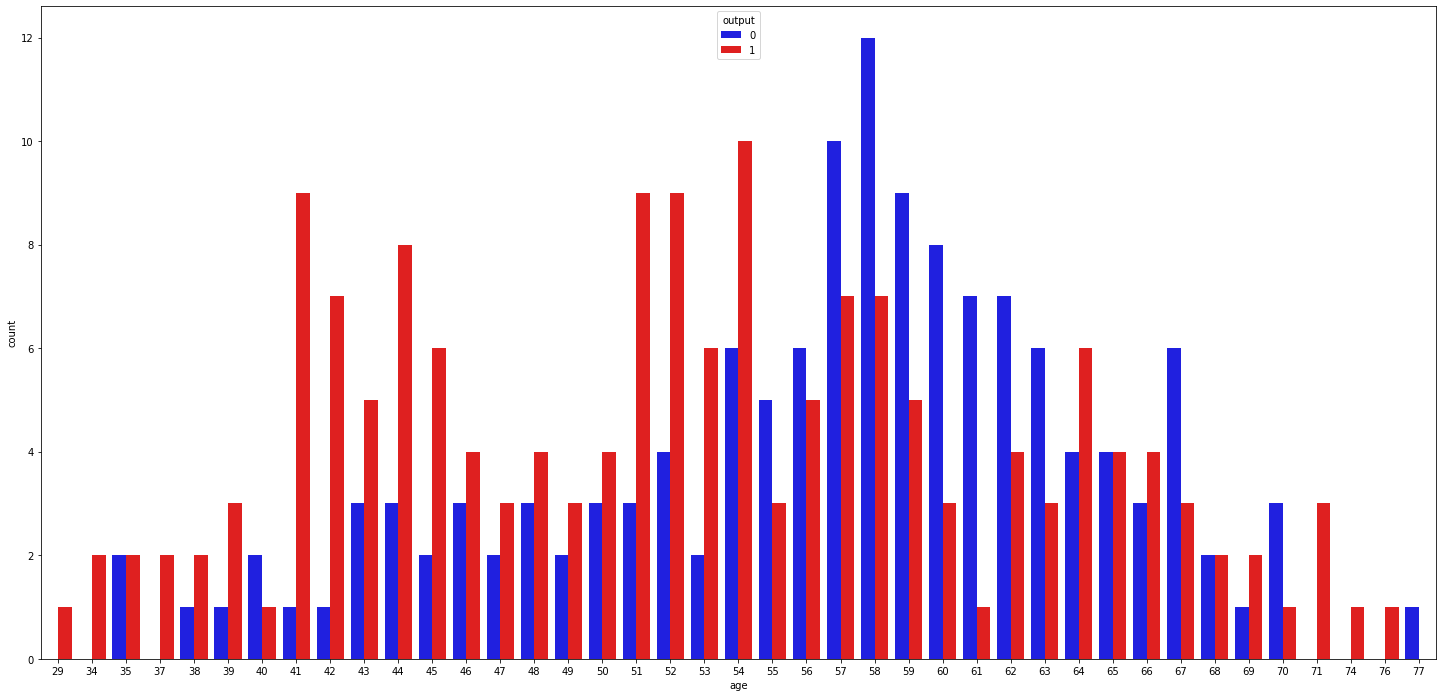

In [ ]:
plt.figure(figsize=[25,12])

sns.countplot(x='age',hue = 'output',data=heart, palette= ['b','r']); # hue - It makes a group

In [ ]:
heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

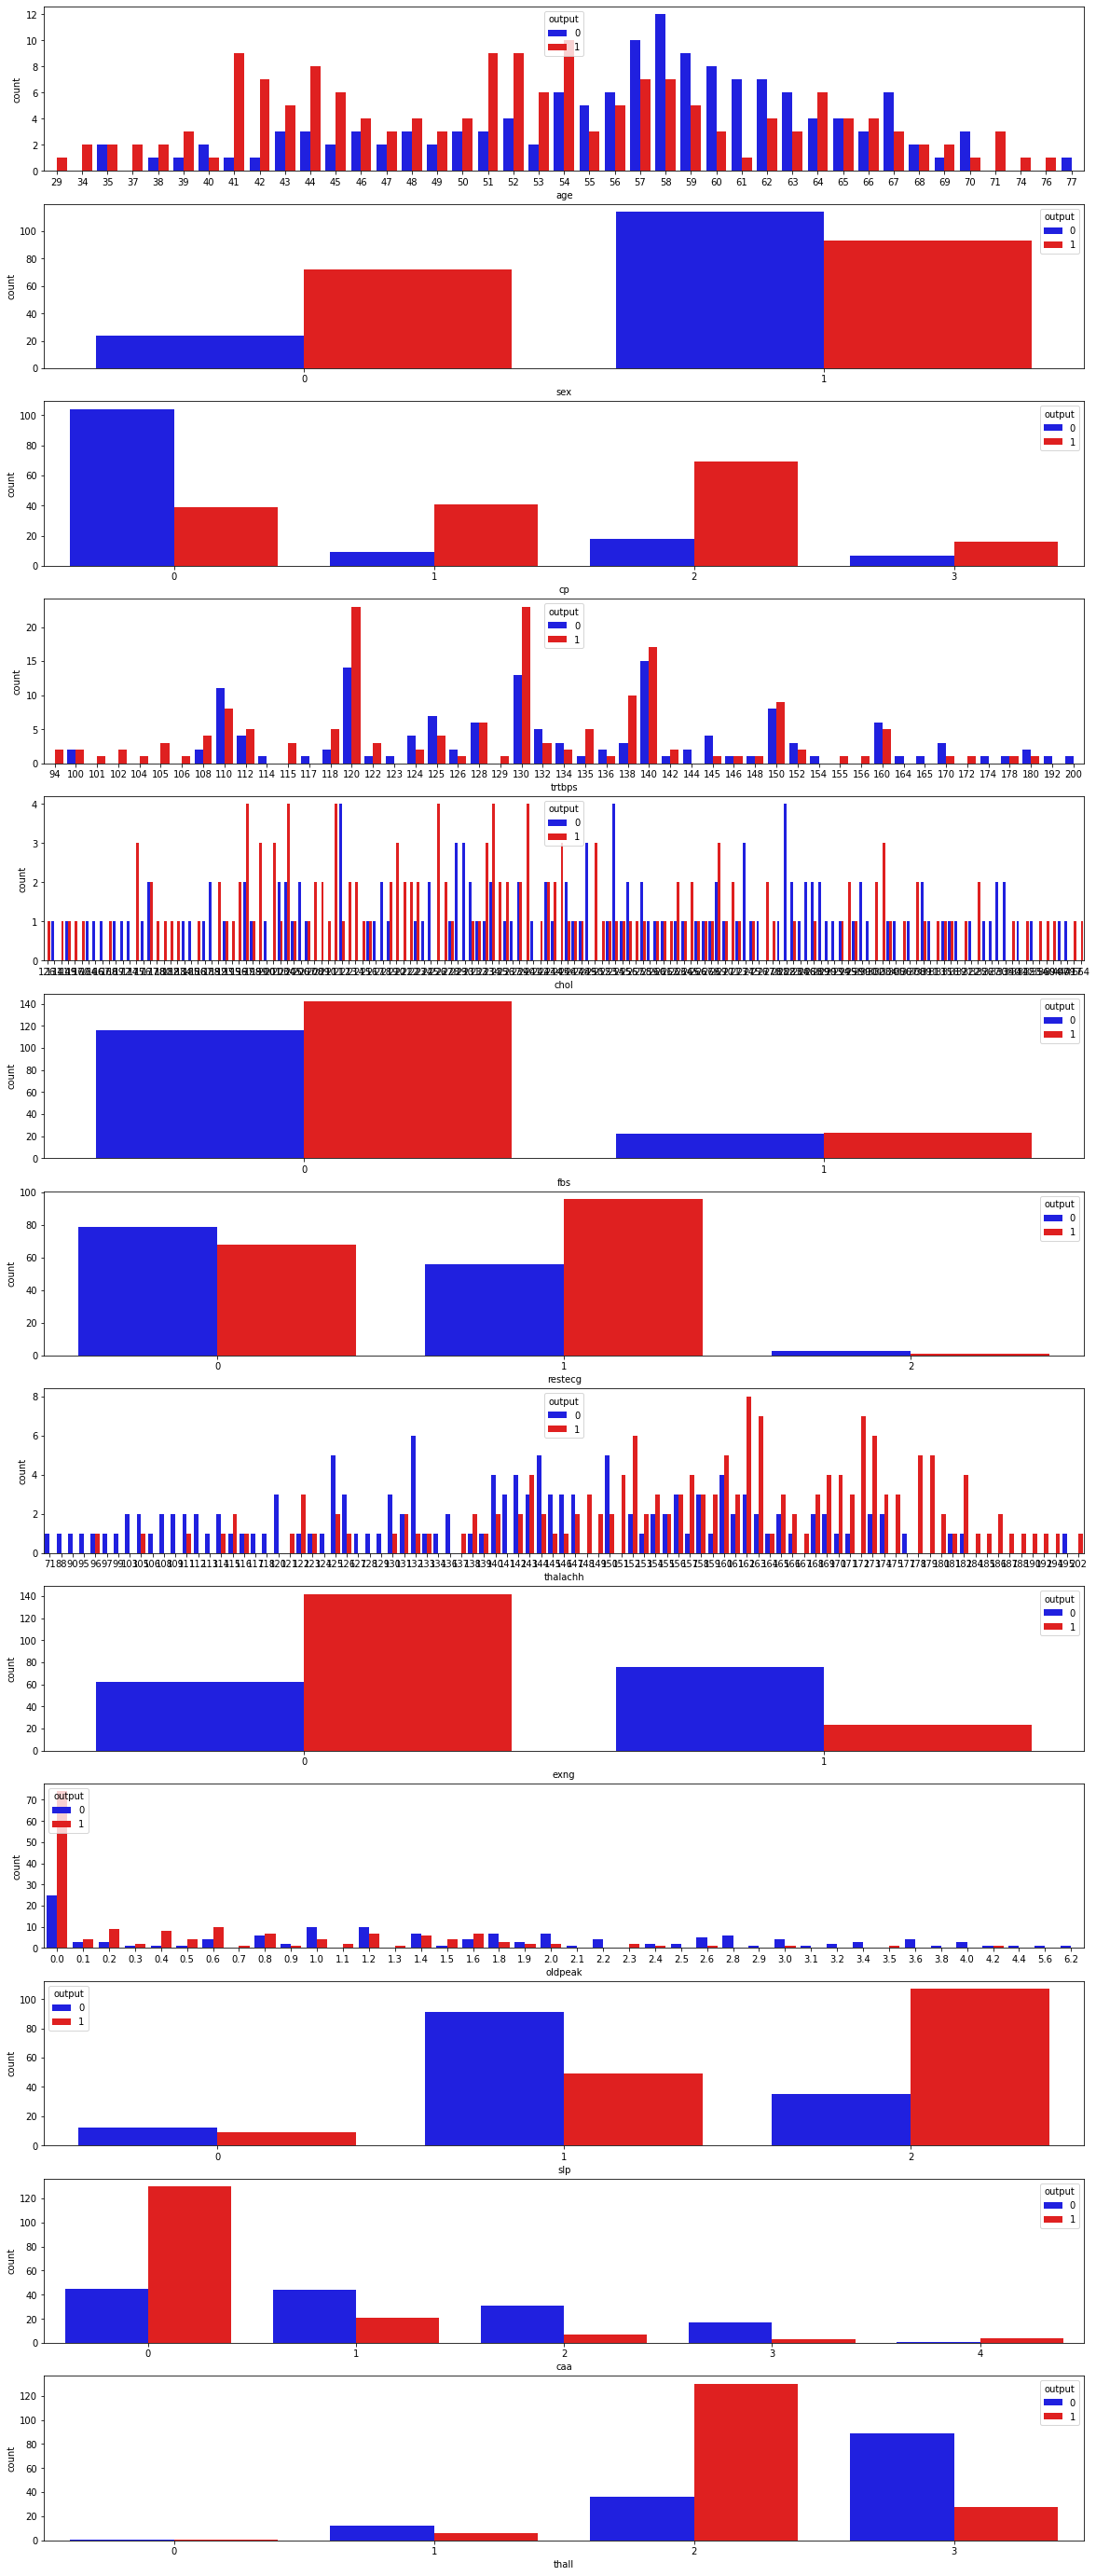

In [ ]:
plt.figure(figsize=[20,50])
plt.subplot(13,1,1) # 4 linha / 1 coluna / id do gráfico 
sns.countplot(x ='age', hue = 'output', data = heart, palette= ['b','r'])
plt.subplot(13,1,2)
sns.countplot(x ='sex', hue = 'output', data = heart, palette= ['b','r'])
plt.subplot(13,1,3)
sns.countplot(x ='cp', hue = 'output', data = heart, palette= ['b','r'])
plt.subplot(13,1,4)
sns.countplot(x ='trtbps', hue = 'output', data = heart, palette= ['b','r'])
plt.subplot(13,1,5)
sns.countplot(x ='chol', hue = 'output', data = heart, palette= ['b','r'])
plt.subplot(13,1,6)
sns.countplot(x ='fbs', hue = 'output', data = heart, palette= ['b','r'])
plt.subplot(13,1,7)
sns.countplot(x ='restecg', hue = 'output', data = heart, palette= ['b','r'])
plt.subplot(13,1,8)
sns.countplot(x ='thalachh', hue = 'output', data = heart, palette= ['b','r'])
plt.subplot(13,1,9)
sns.countplot(x ='exng', hue = 'output', data = heart, palette= ['b','r'])
plt.subplot(13,1,10)
sns.countplot(x ='oldpeak', hue = 'output', data = heart, palette= ['b','r'])
plt.subplot(13,1,11)
sns.countplot(x ='slp', hue = 'output', data = heart, palette= ['b','r'])
plt.subplot(13,1,12)
sns.countplot(x ='caa', hue = 'output', data = heart, palette= ['b','r'])
plt.subplot(13,1,13)
sns.countplot(x ='thall', hue = 'output', data = heart, palette= ['b','r'])

##**Separando dados de teste e dados de treinamento**


In [ ]:
heart.shape

(303, 14)

In [ ]:
X = heart.iloc[:, 0:13]
y = heart.iloc[:, 13]
X.shape, y.shape

((303, 13), (303,))

In [ ]:
X.head()

age  sex  cp  trtbps  chol  fbs  ...  thalachh  exng  oldpeak  slp  caa  thall
0   63    1   3     145   233    1  ...       150     0      2.3    0    0      1
1   37    1   2     130   250    0  ...       187     0      3.5    0    0      2
2   41    0   1     130   204    0  ...       172     0      1.4    2    0      2
3   56    1   1     120   236    0  ...       178     0      0.8    2    0      2
4   57    0   0     120   354    0  ...       163     1      0.6    2    0      2

[5 rows x 13 columns]

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [ ]:
y.value_counts()

1    165
0    138
Name: output, dtype: int64

* **Dividindo treinamento e teste**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, stratify = y,
                                                    random_state = 2)

# **Primeiro modelo**

In [ ]:
model_mlp = tf.keras.Sequential()

* **[Link de losses](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)**

In [ ]:
#---------------------- Conectando a camada de Input -------------------------------------

model_mlp.add(tf.keras.layers.Dense(units = 7, activation = 'relu', input_shape=(13,)))

#------------------------- Camada oculta ----------------------------------------

model_mlp.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

#-------------------------- camada de output ---------------------------------------
model_mlp.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

#-------------------------- Compilando --------------------------------------------
model_mlp.compile(optimizer  = 'Adam', loss = 'BinaryCrossentropy', metrics = ['accuracy'])

In [ ]:
model_mlp.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 7)                 98        
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 8         
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


* **O bias já é adicionado como padrão**

* **Treinando a Rede Neural**


In [ ]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 10)

model_mlp.fit(X_train, y_train, epochs= 500, ) # callbacks = callback

Epoch 1/500
8/8 [==============================] - 0s 3ms/step - loss: 26.2723 - accuracy: 0.5455
Epoch 2/500
8/8 [==============================] - 0s 2ms/step - loss: 23.5710 - accuracy: 0.5455
Epoch 3/500
8/8 [==============================] - 0s 4ms/step - loss: 21.0286 - accuracy: 0.5455
Epoch 4/500
8/8 [==============================] - 0s 2ms/step - loss: 18.7588 - accuracy: 0.5455
Epoch 5/500
8/8 [==============================] - 0s 2ms/step - loss: 16.7370 - accuracy: 0.5455
Epoch 6/500
8/8 [==============================] - 0s 2ms/step - loss: 14.9119 - accuracy: 0.5455
Epoch 7/500
8/8 [==============================] - 0s 2ms/step - loss: 13.2726 - accuracy: 0.5455
Epoch 8/500
8/8 [==============================] - 0s 2ms/step - loss: 11.8625 - accuracy: 0.5455
Epoch 9/500
8/8 [==============================] - 0s 2ms/step - loss: 10.6357 - accuracy: 0.5455
Epoch 10/500
8/8 [==============================] - 0s 3ms/step - loss: 9.5440 - accuracy: 0.5455
Epoch 11/500
8/8 [==

In [ ]:
y_pred = model_mlp.predict(X_test)
y_pred = (y_pred >= 0.5)
y_pred

array([[False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True]])

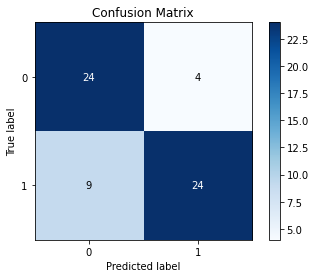

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        28
           1       0.86      0.73      0.79        33

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



# **Segundo preprocessamento e segundo modelo**

* **Só será adicionado a padronização**

In [ ]:
X = heart.iloc[:, 0:13]
y = heart.iloc[:, 13]
X.shape, y.shape

((303, 13), (303,))

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size = 0.2,
                                                    random_state = 2)

* **Construindo o modelo**

In [ ]:
model_mlp = tf.keras.Sequential()

#---------------------- Conectando camada de Input -------------------------------------
# (nºinputs + nº output) / 2 => n° neuronios no modelo - (13+1)/2 = 7
model_mlp.add(tf.keras.layers.Dense(units = 7, activation = 'relu', input_shape=(13,)))

#---------------------------- Dropout ------------------------------------------
model_mlp.add(tf.keras.layers.Dropout(rate = 0.1))

#------------------------- Camadas ocultas ----------------------------------------
model_mlp.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

#---------------------------- Dropout ------------------------------------------
model_mlp.add(tf.keras.layers.Dropout(rate = 0.1))

model_mlp.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))


#---------------------------- Dropout ------------------------------------------
model_mlp.add(tf.keras.layers.Dropout(rate = 0.1))

#-------------------------- camada de Output ---------------------------------------
model_mlp.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

#-------------------------- Compilando --------------------------------------------
model_mlp.compile(optimizer  = 'Adam', loss = 'BinaryCrossentropy', metrics = ['accuracy'])


model_mlp.summary()

Model: "sequential_430"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1446 (Dense)           (None, 7)                 98        
_________________________________________________________________
dropout (Dropout)            (None, 7)                 0         
_________________________________________________________________
dense_1447 (Dense)           (None, 7)                 56        
_________________________________________________________________
dropout_1 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_1448 (Dense)           (None, 7)                 56        
_________________________________________________________________
dropout_2 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_1449 (Dense)           (None, 1)              

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 7)

model_mlp.fit(X_train, y_train, epochs= 1000, callbacks = callback)

Epoch 1/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7849 - accuracy: 0.4298
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7641 - accuracy: 0.4463
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7443 - accuracy: 0.4504
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7162 - accuracy: 0.4669
Epoch 5/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7087 - accuracy: 0.4793
Epoch 6/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7006 - accuracy: 0.5124
Epoch 7/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5083
Epoch 8/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6712 - accuracy: 0.5041
Epoch 9/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6648 - accuracy: 0.5579
Epoch 10/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.5372
Epoch 11/1000
8/8 [

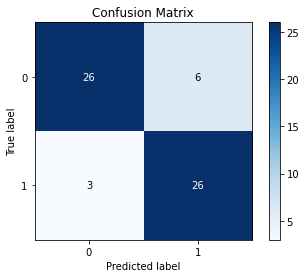

In [ ]:
y_pred = model_mlp.predict(X_test)
y_pred = (y_pred >= 0.5)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85        32
           1       0.81      0.90      0.85        29

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



# **Terceiro pré processamento e terceiro modelo**

In [ ]:
X = heart.iloc[:, 0:13]
y = heart.iloc[:, 13]
X.shape, y.shape


((303, 13), (303,))

In [ ]:
X.head()

age  sex  cp  trtbps  chol  fbs  ...  thalachh  exng  oldpeak  slp  caa  thall
0   63    1   3     145   233    1  ...       150     0      2.3    0    0      1
1   37    1   2     130   250    0  ...       187     0      3.5    0    0      2
2   41    0   1     130   204    0  ...       172     0      1.4    2    0      2
3   56    1   1     120   236    0  ...       178     0      0.8    2    0      2
4   57    0   0     120   354    0  ...       163     1      0.6    2    0      2

[5 rows x 13 columns]

* **Fazendo Feature Selection**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [ ]:

selector = SelectKBest(f_classif, k =10)
X_new1 = selector.fit_transform(X_scaled, y)
lista1 = list(X.columns[selector.get_support()])
lista1

['age',
 'sex',
 'cp',
 'trtbps',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall']

* **Selecionando as features**

In [ ]:
X_selected = X[lista1]
X_selected.head()

age  sex  cp  trtbps  thalachh  exng  oldpeak  slp  caa  thall
0   63    1   3     145       150     0      2.3    0    0      1
1   37    1   2     130       187     0      3.5    0    0      2
2   41    0   1     130       172     0      1.4    2    0      2
3   56    1   1     120       178     0      0.8    2    0      2
4   57    0   0     120       163     1      0.6    2    0      2

In [ ]:
X_selected.shape

(303, 10)

In [ ]:
scaler1 = StandardScaler()
X_scaled1 = scaler1.fit_transform(X_selected)
X_scaled1

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled1, y, 
                                                    test_size = 0.2, stratify = y,
                                                    random_state = 1)

In [ ]:
model_mlp = tf.keras.Sequential()

#---------------------- Conectando Input -------------------------------------

model_mlp.add(tf.keras.layers.Dense(units = 7, activation = 'relu', input_shape=(10,)))

#---------------------------- Dropout ------------------------------------------
model_mlp.add(tf.keras.layers.Dropout(rate = 0.1))

#------------------------- camada oculta ----------------------------------------
# Afterwards, we do automatic shape inference:
model_mlp.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

#---------------------------- Dropout ------------------------------------------
model_mlp.add(tf.keras.layers.Dropout(rate = 0.1))

#-------------------------- camada de output ---------------------------------------
model_mlp.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

#-------------------------- Compilando --------------------------------------------
model_mlp.compile(optimizer  = 'Adam', loss = 'BinaryCrossentropy', metrics = ['accuracy'])


callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 10)

model_mlp.fit(X_train, y_train, epochs= 1000, callbacks = callback)


Epoch 1/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.8193 - accuracy: 0.4545
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.7690 - accuracy: 0.5000
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7495 - accuracy: 0.4711
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7440 - accuracy: 0.4752
Epoch 5/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7358 - accuracy: 0.5289
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.7101 - accuracy: 0.5124
Epoch 7/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.5248
Epoch 8/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.5455
Epoch 9/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6844 - accuracy: 0.5083
Epoch 10/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6573 - accuracy: 0.5785
Epoch 11/1000
8/8 [

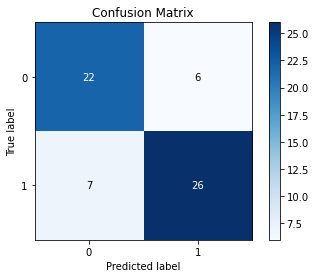

In [ ]:
y_pred = model_mlp.predict(X_test)
y_pred = (y_pred >= 0.5)

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.81      0.79      0.80        33

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



# **Quarto preprocessamento e quarto modelo**

In [ ]:
X_selected = X[lista1]
X_selected.head()

age  sex  cp  trtbps  thalachh  exng  oldpeak  slp  caa  thall
0   63    1   3     145       150     0      2.3    0    0      1
1   37    1   2     130       187     0      3.5    0    0      2
2   41    0   1     130       172     0      1.4    2    0      2
3   56    1   1     120       178     0      0.8    2    0      2
4   57    0   0     120       163     1      0.6    2    0      2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, 
                                                    test_size = 0.2, stratify = y,
                                                    random_state = 1)

In [ ]:
model_mlp = tf.keras.Sequential()

#---------------------- Conectando Input  -------------------------------------
model_mlp.add(tf.keras.layers.Dense(units = 7, activation = 'relu', input_shape=(10,)))

#---------------------------- Dropout ------------------------------------------
model_mlp.add(tf.keras.layers.Dropout(rate = 0.05))

#------------------------- oculta ----------------------------------------
# Afterwards, we do automatic shape inference:
model_mlp.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

#---------------------------- Dropout ------------------------------------------
model_mlp.add(tf.keras.layers.Dropout(rate = 0.05))

#-------------------------- Output ---------------------------------------
model_mlp.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

#-------------------------- Compilando --------------------------------------------
model_mlp.compile(optimizer  = 'Adam', loss = 'BinaryCrossentropy', metrics = ['accuracy'])


#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 10)

model_mlp.fit(X_train, y_train, epochs= 400,) #callbacks = callback)

Epoch 1/400
8/8 [==============================] - 0s 3ms/step - loss: 22.1285 - accuracy: 0.4669
Epoch 2/400
8/8 [==============================] - 0s 3ms/step - loss: 17.9193 - accuracy: 0.4628
Epoch 3/400
8/8 [==============================] - 0s 3ms/step - loss: 15.2528 - accuracy: 0.4587
Epoch 4/400
8/8 [==============================] - 0s 3ms/step - loss: 11.9829 - accuracy: 0.4380
Epoch 5/400
8/8 [==============================] - 0s 3ms/step - loss: 6.8372 - accuracy: 0.4587
Epoch 6/400
8/8 [==============================] - 0s 3ms/step - loss: 7.1602 - accuracy: 0.3760
Epoch 7/400
8/8 [==============================] - 0s 3ms/step - loss: 4.9748 - accuracy: 0.4628
Epoch 8/400
8/8 [==============================] - 0s 3ms/step - loss: 4.7418 - accuracy: 0.4504
Epoch 9/400
8/8 [==============================] - 0s 3ms/step - loss: 4.5269 - accuracy: 0.3636
Epoch 10/400
8/8 [==============================] - 0s 3ms/step - loss: 6.1178 - accuracy: 0.3388
Epoch 11/400
8/8 [=======

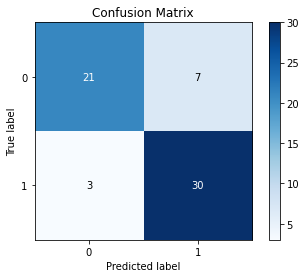

In [ ]:
y_pred = model_mlp.predict(X_test)
y_pred = (y_pred >= 0.5)

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.81      0.91      0.86        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61



# **Grid Search**

In [ ]:
X = heart.iloc[:, 0:13]
y = heart.iloc[:, 13]
X.shape, y.shape

((303, 13), (303,))

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [ ]:
def Neural_network(n_neurons = 7,  activation_model = 'relu', optimizer_model  = 'Adam', loss_model = 'binary_crossentropy', activation_model_out = 'sigmoid'):

 
  neural_network = tf.keras.models.Sequential()

#-------------------------- Input  ----------------------------------------
 
  neural_network.add(tf.keras.layers.Dense(units = n_neurons, activation = activation_model, input_shape = (13,)))

#---------------------------- Dropout ------------------------------------------
  neural_network.add(tf.keras.layers.Dropout(rate = 0.1))



  neural_network.add(tf.keras.layers.Dense(units = n_neurons, activation = activation_model))

#---------------------------- Dropout ------------------------------------------
  neural_network.add(tf.keras.layers.Dropout(rate = 0.1))

#------------------------- oculta ----------------------------------------
  neural_network.add(tf.keras.layers.Dense(units = n_neurons, activation = activation_model))


#---------------------------- Dropout ------------------------------------------
  neural_network.add(tf.keras.layers.Dropout(rate = 0.1))

#-------------------------- Output  ---------------------------------------
  neural_network.add(tf.keras.layers.Dense(units = 1, activation = activation_model_out))

#------------------------------- Compilando ---------------------------------------
  neural_network.compile(optimizer  = optimizer_model, loss = loss_model, metrics = ['accuracy'])


  return neural_network

In [ ]:
grid_neural= [{'n_neurons':[6, 7, 8, 9],  'activation_model':['relu','selu','tanh'],
               'optimizer_model':['Adam', 'SGD', 'RMSprop'], 'loss_model':['binary_crossentropy','hinge','squared_hinge'], 
               'activation_model_out':['sigmoid']}
]

* **Tempo de execução do gridsearch: 2835.956s**

In [ ]:

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 7)

model_neural = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = Neural_network, verbose=1)

neural_cv = GridSearchCV(model_neural, grid_neural, cv = 10, scoring = 'accuracy'); # Usar GPU
neural_cv.fit(X_scaled, y, epochs= 1000, callbacks=callback);

Streaming output truncated to the last 5000 lines.
Epoch 5/1000
9/9 [==============================] - 0s 4ms/step - loss: 1.0535 - accuracy: 0.6949
Epoch 6/1000
9/9 [==============================] - 0s 4ms/step - loss: 1.0047 - accuracy: 0.7132
Epoch 7/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.9937 - accuracy: 0.7132
Epoch 8/1000
9/9 [==============================] - 0s 6ms/step - loss: 0.9766 - accuracy: 0.7647
Epoch 9/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.9447 - accuracy: 0.7316
Epoch 10/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.9470 - accuracy: 0.7169
Epoch 11/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.9385 - accuracy: 0.7279
Epoch 12/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.8882 - accuracy: 0.7390
Epoch 13/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.8888 - accuracy: 0.7316
Epoch 14/1000
9/9 [==============================] - 0s 5ms/ste

In [ ]:
print("Tuned hyperparameters:(best parameters) ",neural_cv.best_params_)
print("Accuracy:",neural_cv.best_score_)

Tuned hyperparameters:(best parameters)  {'activation_model': 'tanh', 'activation_model_out': 'sigmoid', 'loss_model': 'binary_crossentropy', 'n_neurons': 6, 'optimizer_model': 'Adam'}
Accuracy: 0.8212903225806452


In [ ]:
print(neural_cv.cv_results_)

{'mean_fit_time': array([2.64100122, 3.24405692, 3.47227533, 3.44825175, 3.32596359,
       4.02351086, 3.29116688, 3.67817996, 3.38750529, 2.84094551,
       3.52555935, 3.52029455, 4.40749679, 3.57228215, 4.92399242,
       3.98735776, 3.48970776, 4.39869876, 4.2047718 , 3.32316062,
       4.02190764, 3.79854693, 3.49135368, 4.16484957, 3.50023925,
       3.93062825, 4.42520261, 3.95601215, 3.46416602, 3.80860457,
       3.55362794, 4.50781147, 3.92049539, 3.90915673, 3.96952899,
       4.074599  , 2.6813354 , 2.49960997, 3.0933562 , 2.65206406,
       2.49756107, 2.82178695, 2.35984583, 2.20465469, 2.40129888,
       2.33572042, 2.00252836, 2.42055416, 3.4974895 , 3.5021462 ,
       3.5248683 , 3.49782662, 3.30582576, 3.51925032, 3.08962026,
       3.38823566, 3.37558501, 3.08238859, 3.04569728, 3.03831873,
       3.1734462 , 2.6703826 , 2.86571167, 2.70935013, 2.5790868 ,
       2.93639138, 2.75847604, 2.74614158, 2.78264024, 2.50031359,
       2.46924314, 3.05091591, 3.12365675, 3

In [ ]:
neural_cv.best_index_

72

In [ ]:
neural_cv.scorer_

make_scorer(accuracy_score)

In [ ]:
neural_cv.n_splits_

10

# **Modelo final**

In [ ]:
X = heart.iloc[:, 0:13]
y = heart.iloc[:, 13]
X.shape, y.shape

((303, 13), (303,))

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [ ]:
results_ann_cv = []

kf = RepeatedKFold(n_splits = 10, n_repeats = 10, random_state= 0)

for lines_train, lines_valid in kf.split(X_scaled):

  X_train, X_valid = X_scaled[lines_train], X_scaled[lines_valid]
  y_train, y_valid = y.iloc[lines_train], y.iloc[lines_valid]

  model_mlp = tf.keras.Sequential()

  #---------------------- Input  -------------------------------------
 
  model_mlp.add(tf.keras.layers.Dense(units = 6, activation = 'tanh', input_shape=(13,)))

  #---------------------------- Dropout ------------------------------------------
  model_mlp.add(tf.keras.layers.Dropout(rate = 0.1))

  #------------------------- camada oculta ----------------------------------------
  
  model_mlp.add(tf.keras.layers.Dense(units = 6, activation = 'tanh'))

  #---------------------------- Dropout ------------------------------------------
  model_mlp.add(tf.keras.layers.Dropout(rate = 0.1))

  model_mlp.add(tf.keras.layers.Dense(units = 6, activation = 'tanh'))


  #---------------------------- Dropout ------------------------------------------
  model_mlp.add(tf.keras.layers.Dropout(rate = 0.1))

  #-------------------------- Output ---------------------------------------
  model_mlp.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

  #-------------------------- Compilando --------------------------------------------
  model_mlp.compile(optimizer  = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


  callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 7)

  model_mlp.fit(X_train, y_train, epochs= 1000, callbacks = callback)

  y_pred = model_mlp.predict(X_valid)
  y_pred = (y_pred >= 0.5)
  ac = accuracy_score(y_valid, y_pred)
  print(f'The last accuracy is {ac}') 
  results_ann_cv.append(ac)
  print('------------------------------------------')

Streaming output truncated to the last 5000 lines.
Epoch 55/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3953 - accuracy: 0.8315
Epoch 56/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3990 - accuracy: 0.8242
Epoch 57/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.3725 - accuracy: 0.8535
Epoch 58/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3789 - accuracy: 0.8425
Epoch 59/1000
9/9 [==============================] - 0s 6ms/step - loss: 0.3647 - accuracy: 0.8462
Epoch 60/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3819 - accuracy: 0.8425
Epoch 61/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3801 - accuracy: 0.8498
Epoch 62/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3920 - accuracy: 0.8388
Epoch 63/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3967 - accuracy: 0.8425
Epoch 64/1000
9/9 [==============================] - 0s 4m

In [ ]:
len(results_ann_cv)

100

In [ ]:
print(results_ann_cv)

[0.6774193548387096, 0.8064516129032258, 0.8064516129032258, 0.8333333333333334, 0.7333333333333333, 0.9333333333333333, 0.8, 0.8333333333333334, 0.7666666666666667, 0.8666666666666667, 0.9032258064516129, 0.8064516129032258, 0.8064516129032258, 0.8333333333333334, 0.7666666666666667, 0.8333333333333334, 0.7666666666666667, 0.7333333333333333, 0.8, 0.9333333333333333, 0.8709677419354839, 0.8064516129032258, 0.7741935483870968, 0.9333333333333333, 0.7333333333333333, 0.8, 0.8666666666666667, 0.7666666666666667, 0.8333333333333334, 0.8666666666666667, 0.7096774193548387, 0.8387096774193549, 0.9032258064516129, 0.9, 0.6, 0.8333333333333334, 0.7333333333333333, 0.8333333333333334, 0.8666666666666667, 0.8, 0.8709677419354839, 0.9032258064516129, 0.7419354838709677, 0.8333333333333334, 0.7333333333333333, 0.8666666666666667, 0.8666666666666667, 0.8333333333333334, 0.7666666666666667, 0.8, 0.8387096774193549, 0.8387096774193549, 0.967741935483871, 0.9666666666666667, 0.7666666666666667, 0.8, 

In [ ]:
np.asarray(results_ann_cv).shape

(100,)

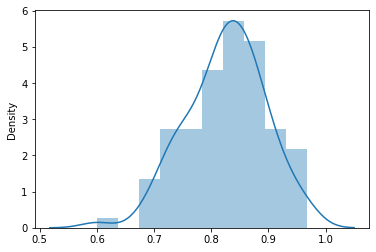

In [ ]:
sns.distplot(results_ann_cv);

In [ ]:
sum(results_ann_cv)/len(results_ann_cv)

0.8256021505376343

In [ ]:
from scipy.stats import norm
from scipy import stats

In [ ]:
results_ann_cv_array = np.array(results_ann_cv)

In [ ]:
intervalo_ann = norm.interval(0.95, results_ann_cv_array.mean(),
                             stats.sem(results_ann_cv_array))
intervalo_ann

(0.8121014034035331, 0.8391028976717357)